# Invasive Ductal Cancer

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Resolve changes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import load_model

In [ ]:
# Running locally
X = np.load('../idc/data/X.npy')
y = np.load('../idc/data/Y.npy')

In [3]:
# Running in Colab
X = np.load('/content/drive/MyDrive/Colab Notebooks/data/X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/data/Y.npy')

In [4]:
X.shape

(5547, 50, 50, 3)

In [5]:
y.shape

(5547,)

## CNN Model Evaluation

In [6]:
X_scaled = X/255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [33]:
def init_model(learning_rate=0.001, kernel_size=(2,2)):
  model = models.Sequential()
  model.add(layers.Conv2D(64, kernel_size=kernel_size, input_shape=(50, 50, 3), padding='same', activation="relu"))
  model.add(layers.Conv2D(32, kernel_size=kernel_size, padding='same', activation="relu"))
  model.add(layers.Conv2D(16, kernel_size=kernel_size, padding='same', activation="relu"))
  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', Recall(thresholds=0.35), Precision(thresholds=0.35)])
 
  return model

In [34]:
model = KerasClassifier(build_fn=init_model)

batch_size = [32, 64, 128]
learning_rate = [0.0001, 0.001, 0.01]
kernel_size = [(2,2), (3,3), (4,4), (5,5)]
param_grid = dict(learning_rate=learning_rate, batch_size=batch_size, kernel_size=kernel_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


139/139 [==============================] - 4s 20ms/step - loss: 0.5956 - accuracy: 0.6851 - recall_4: 0.8648 - precision_4: 0.6132


In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.697763 using {'batch_size': 32, 'kernel_size': (2, 2), 'learning_rate': 0.001}
0.673649 (0.016804) with: {'batch_size': 32, 'kernel_size': (2, 2), 'learning_rate': 0.0001}
0.697763 (0.034585) with: {'batch_size': 32, 'kernel_size': (2, 2), 'learning_rate': 0.001}
0.558962 (0.064853) with: {'batch_size': 32, 'kernel_size': (2, 2), 'learning_rate': 0.01}
0.687403 (0.019345) with: {'batch_size': 32, 'kernel_size': (3, 3), 'learning_rate': 0.0001}
0.606912 (0.077411) with: {'batch_size': 32, 'kernel_size': (3, 3), 'learning_rate': 0.001}
0.499436 (0.011656) with: {'batch_size': 32, 'kernel_size': (3, 3), 'learning_rate': 0.01}
0.652930 (0.044857) with: {'batch_size': 32, 'kernel_size': (4, 4), 'learning_rate': 0.0001}
0.618439 (0.090037) with: {'batch_size': 32, 'kernel_size': (4, 4), 'learning_rate': 0.001}
0.499436 (0.011656) with: {'batch_size': 32, 'kernel_size': (4, 4), 'learning_rate': 0.01}
0.696873 (0.020059) with: {'batch_size': 32, 'kernel_size': (5, 5), 'learning_rate': 

In [36]:
model = init_model()
history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=64, 
          verbose=1,
          callbacks=es)

Epoch 1/100
56/56 [==============================] - 4s 46ms/step - loss: 0.6744 - accuracy: 0.5810 - recall_5: 0.9244 - precision_5: 0.5304 - val_loss: 0.6716 - val_accuracy: 0.6261 - val_recall_5: 1.0000 - val_precision_5: 0.5191
Epoch 2/100
56/56 [==============================] - 2s 36ms/step - loss: 0.6017 - accuracy: 0.6912 - recall_5: 0.8933 - precision_5: 0.5927 - val_loss: 0.5413 - val_accuracy: 0.7173 - val_recall_5: 0.7570 - val_precision_5: 0.7950
Epoch 3/100
56/56 [==============================] - 2s 36ms/step - loss: 0.5618 - accuracy: 0.7301 - recall_5: 0.8589 - precision_5: 0.6643 - val_loss: 0.5002 - val_accuracy: 0.7793 - val_recall_5: 0.8915 - val_precision_5: 0.7211
Epoch 4/100
56/56 [==============================] - 2s 36ms/step - loss: 0.5298 - accuracy: 0.7588 - recall_5: 0.8634 - precision_5: 0.6964 - val_loss: 0.4983 - val_accuracy: 0.7939 - val_recall_5: 0.9523 - val_precision_5: 0.6542
Epoch 5/100
56/56 [==============================] - 2s 36ms/step - loss

In [37]:
y_pred = model.predict(X_test)
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 11ms/step - loss: 0.5139 - accuracy: 0.7640 - recall_5: 0.9081 - precision_5: 0.6478


[0.5138555765151978, 0.7639639377593994, 0.908108115196228, 0.647814929485321]

Precision Recall Curve

In [38]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.50090253 0.50045167 0.50090416 0.50135747 0.50181159]
recall- [1.        0.9981982 0.9981982 0.9981982 0.9981982]
threshold- [0.08198481 0.08257739 0.08590981 0.08616588 0.08714527]


In [39]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]})
scores.head()

,threshold,precision,recall
0,0.081985,0.500903,1.000000
1,0.082577,0.500452,0.998198
2,0.085910,0.500904,0.998198
3,0.086166,0.501357,0.998198
4,0.087145,0.501812,0.998198


Text(0.5, 0, 'recall')

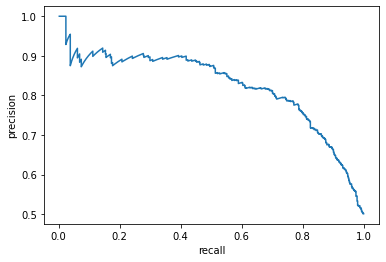

In [40]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [52]:
# Find threshold that guarantees 0.8 recall score
threshold = scores[scores['recall'] >= 0.85].threshold.max()
threshold

0.45337414741516113

Predict using test data

In [53]:
def binary_predict(y_pred, custom_threshold=0.41):
    return (y_pred > custom_threshold).astype(int)

updated_preds = binary_predict(y_pred, custom_threshold=threshold)

print(recall_score(y_test, updated_preds))
print(precision_score(y_test, updated_preds))
print(f1_score(y_test, updated_preds))

0.8486486486486486
0.7061469265367316
0.7708674304418985


Creating a report

In [44]:
def model_diagnosis(y_pred):
    mean_prob = np.mean(y_pred)
    if mean_prob >= 0.7:
        return 'High IDC probability'
    elif mean_prob >= 0.4:
        return 'Medium IDC probability'
    else:
      return 'Low IDC probability'

In [45]:
def generate_report(X_scaled, y_pred):
    # Remove the top 10% whitest images from predictions
    white_threshold = max([image.mean() for image in X_scaled]) * 0.90
    remove_white_mask = [image.mean() <= white_threshold for image in X_scaled]
    X_non_white = X_scaled[remove_white_mask]
    y_pred = y_pred[remove_white_mask]

    # Generate report using non-white images
    report = {}
    y_binary = binary_predict(y_pred)
    report['sum_positive'] = sum(y_binary)[0]
    report['percent_positive'] = round((report['sum_positive']/y_pred.shape[0])*100, 2)
    report['mean_probability'] = round(np.mean(y_pred)*100, 2)
    report['model_diagnosis'] = model_diagnosis(y_pred)
    return report

In [46]:
a = generate_report(X_test, y_pred)
a

{'mean_probability': 65.09,
 'model_diagnosis': 'Medium IDC probability',
 'percent_positive': 80.12,
 'sum_positive': 689}

Save and load model

In [48]:
###################################
#   RENAME YOUR MODEL EVERY TIME  #
#     AVOID OVERWRITING MODELS    #
###################################

# From Elizabeth's Colab Notebook
model.save('/content/drive/MyDrive/Colab Notebooks/model5.h5')

# Local save
#model.save('../models/model2.h5')

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 50, 50, 64)        832       
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        8224      
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 16)        2064      
                                                                 
 flatten_5 (Flatten)         (None, 40000)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 40001     
                                                                 
Total params: 51,121
Trainable params: 51,121
Non-trainable params: 0
_________________________________________________________________
